In [2]:
from Functions import *
from Kernels import *
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import plotly.graph_objects as go
import utils


%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def smooth(inp, out, K):
    """Assumes that inp[i] - inp[i-1] = d for all i"""
    k_inp = []
    for x in inp:
        d = x[1] - x[0]
        assert d > 0
        tmp = np.linspace(int(float(-len(x)*d)/2), int(float(len(x)*d)/2), len(x) + 1 - len(x)%2)[:len(x)]
        k_inp.append(tmp)
    k_inp = np.array(k_inp)
    kernel = K(k_inp, np.array([0] * len(inp)))
    return np.convolve(out, kernel, "same")


# 1D functions

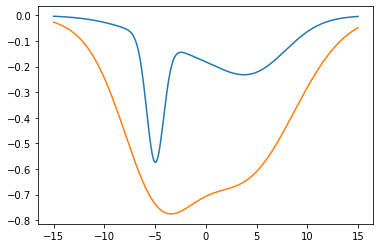

In [8]:
X = np.linspace(-15, 15, 1000)
inp = np.array([X])

out = flat_sharp_gaussian(inp)
K = multi_gaussian(np.array([[10]]))
smooth_out = smooth(inp, out, K) * 0.1

plt.plot(X, out)
plt.plot(X, smooth_out)
plt.show()

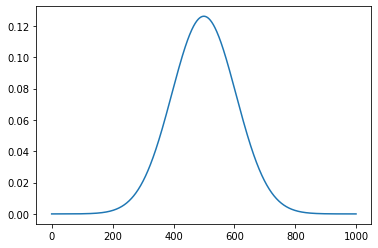

In [13]:
K = multi_gaussian(np.array([[10]]))
X = np.linspace(-15, 15, 1000)
out = K(np.array([X.T]), np.array([0]))

plt.plot(out)
plt.show()


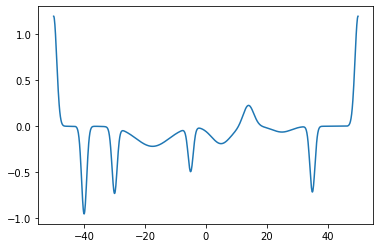

In [17]:
X = np.linspace(-50, 50, 1000)
inp = np.array([X])

g_params = [[-40, 0.7, -2],[-30, 0.7, -1.5],[-5, 0.7, -1], [35, 0.7, -1.5], 
            [-17.5, 30, -3], [5, 10, -1.5], [14, 3, 1], [25, 10, -0.5], 
            [-50, 1, 3], [50, 1, 3]]
func = gaussian_sum(g_params) # AckleyProblem # 
g_func = GradAckleyProblem # grad_gaussian_sum(g_params)

out = func(inp)
K = multi_gaussian(np.array([[1]]))
smooth_out = smooth(inp, out, K)

out_grad = g_func(inp)
# out_grad = grad(flat_sharp_hill_gaussian)(inp) #grad_flat_sharp_hill_gaussian(inp)

plt.plot(X, out)
# plt.plot(X, out_grad[0])

plt.show()

In [27]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))

g_func = GradAckleyProblem
out = g_func(inp)

In [32]:
np.linalg.norm(g_func(inp), axis=0).shape

(10000,)

In [33]:
inp[0][0]

-5.0

In [30]:
out.shape

(2, 10000)

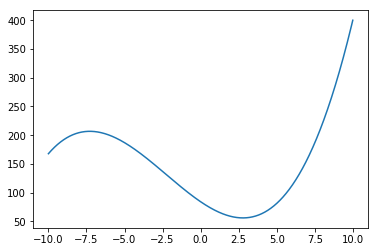

In [12]:
X = np.linspace(-10, 10, 1000)
inp = np.array([X])

out = (inp[0]/1.5)**3 + (inp[0] - 8)**2 + (inp[0] + 4)**2 + (-inp[0]*10 + 4)

plt.plot(X, out)
plt.show()


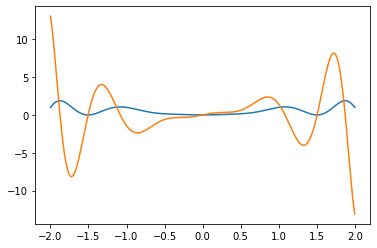

In [197]:
X = np.linspace(-2, 2, 1000)
inp = np.array([X])

out = one_D_shallow(inp)
out_grad = grad_one_D_shallow(inp)

plt.plot(X, out)
plt.plot(X, out_grad[0])
plt.show()


# 2D functions

In [14]:
def multi_gaussian(cov):
    def multi_gaussian_helper(inp, mu):
        """same mu for every datapoint given in ipn"""
        k = inp.shape[0]
        diff = (inp.T - mu).T        
        return 1 / np.sqrt(pow(2 * np.pi, k) * np.linalg.det(cov)) * np.exp(
            -0.5 * np.sum(diff*(np.linalg.inv(cov).dot(diff)), axis=0))
    return multi_gaussian_helper

In [15]:
def himmelblau_2d(inp):
    x = inp[0]
    y = inp[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 11)**2

In [41]:
def weight_function_discounted_norm(U, grad_U, x, curr_weights, gamma=1, partials=None):
    grad = grad_U(x.T)
    if partials is not None:
        grad = grad[partials]
    return gamma * curr_weights + np.linalg.norm(grad, axis=0)

In [3]:
# g_params = [[-40, 0.7, -2],[-30, 0.7, -1.5],[-5, 0.7, -1], [35, 0.7, -1.5], 
#             [-17.5, 30, -3], [5, 10, -1.5], [14, 3, 1], [25, 10, -0.5], 
#             [-50, 1, 3], [50, 1, 3]]
g_params = [[-10, 1, -2], [0, 10, -1], [10, 3, 1], [-20, 1, 3], [20, 1, 3]]

process = {}

process["particle_init"] = {"name": "2d_uniform", 
                            "num_particles": 5000}

process["potential_function"] = {"name": "2d_gaussian_symmetric", #} 
                                 "params": g_params}

process["total_iter"] = 20
process["tau"] = 20
process["x_range"] = [-25, 25]

process["gamma"] = 0.1
process["temperature"] = 0.5
process["epsilon"] = 0

process["weight_function"] = {"name": "norm"} 
process["resample_function"] = {"name": "softmax", "params": {"beta": -0.05}} 

process["domain_enforcer"] = {"name": "hyper_cube_enforcer", "params": {"strength": 0.2}}

In [ ]:
X = np.linspace(-50, 50, 1000)
inp = np.array([X])


func = gaussian_sum(g_params) # AckleyProblem # 
g_func = GradAckleyProblem # grad_gaussian_sum(g_params)

out = func(inp)
K = multi_gaussian(np.array([[1]]))
smooth_out = smooth(inp, out, K)

out_grad = g_func(inp)
# out_grad = grad(flat_sharp_hill_gaussian)(inp) #grad_flat_sharp_hill_gaussian(inp)

plt.plot(X, out)
# plt.plot(X, out_grad[0])

plt.show()

In [8]:
g_params = [[-10, 1, -2], [0, 10, -1], [10, 3, 1], [-20, 1, 3], [20, 1, 3]]

U, grad_U = utils.get_potential(process)

X = np.linspace(-20, 20, 100)
Y = np.linspace(-20, 20, 100)
inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))


out = grad_U(inp)[0] #U(inp)
out = out.reshape(len(X), len(Y))


In [32]:
K = multi_gaussian(np.array([[10, 5], [5, 5]]))

X = np.linspace(-15, 15, 100)
Y = np.linspace(-15, 15, 100)

inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))

out = out = K(inp, np.array([0, 0]))
#himmelblau_2d(inp)

out = out.reshape(len(X), len(Y))

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [18]:
U(inp)

NameError: name 'U' is not defined

In [196]:
inp

array([[-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -5.       , -5.       , ...,  5.       ,  5.       ,
         5.       ]])

In [170]:
import time

In [ ]:
x_low, x_high, t_low, t_high = -20, 20, 0, 4 # closed interval for spatial and time
delta_x, delta_t = 0.005, 0.000001 # number of points to approximate
sig = 1

process = {"potential_function": {"name": "gaussian", "params": [[-10, 1, -2], [0, 10, -1], [10, 3, 1], [-20, 1, 3], [20, 1, 3]]}}



num_x, num_t = (x_high - x_low)/float(delta_x), (t_high - t_low)/float(delta_t)
# assert (x_high - x_low) // delta_x == num_x
# assert (t_high - t_low) // delta_t == num_t

num_x, num_t = int(num_x) + 1, int(num_t) + 1
u_start = lambda x: 1/float(num_x)

# get potential_function and gradient
# U, grad_U = lambda inp: inp[0]**2, lambda inp: 2 * inp
U, grad_U = utils.get_potential(process)

# init u
u = [np.array([u_start(delta_x * i) for i in range(num_x)])] # 1D is time and rest are space

V = lambda x: np.linalg.norm(grad_U(np.array([[x]])), axis=0)

# create forward matrix
forward_matrix = []

a = time.time()
assert num_x > 3
for i in range(num_x):
    curr_x = x_low + delta_x * i 
    b = grad_U(np.array([[curr_x]]))[0][0]
    
    row = [sig**2 / 2. * delta_t / (delta_x**2) - delta_t*b / (2 * delta_x), - sig**2/2. * 2*delta_t/(delta_x ** 2) - delta_t*V(curr_x)[0] + 1,
     delta_t * b / (2. * delta_x) + sig**2 / 2. * delta_t / (delta_x**2)]
    
    padded_row = [0] * i + row + [0]*(num_x - (i + 1))
    forward_matrix.append(padded_row[1:-1])
    
forward_matrix = np.array(forward_matrix)

print(time.time() - a)

for t in range(num_t):
    u_next = forward_matrix.dot(u[-1])
    u.append(u_next) 
    
print(time.time() - a)

    

124.93578338623047


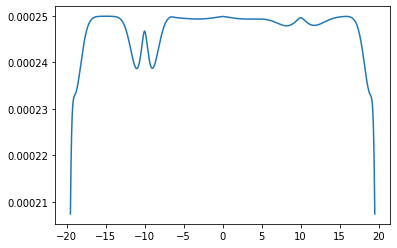

In [209]:
X = np.linspace(-20, 20, num_x)[50: -50]
Y = u[2000][50: -50]

plt.plot(X, Y)
plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

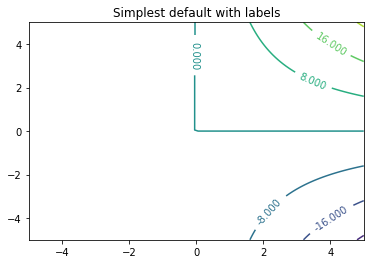

In [8]:
def f(inp):
    x, y = inp[0], inp[1]
    x = np.maximum(x, 0, x)
    return x * y 


X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))

out = f(inp)

out = out.reshape(len(X), len(Y))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, out)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')